# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

2025-04-01 08:15:39.330868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 08:15:39.330897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 08:15:39.332126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 08:15:39.338712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 08:15:39.977696: W tensorflow/compiler/tf2

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

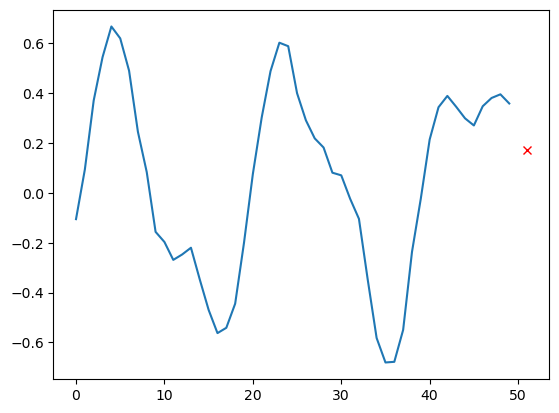

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

2025-04-01 08:15:40.662600: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-01 08:15:40.699750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-01 08:15:40.702643: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
 30/219 [===>..........................] - ETA: 0s - loss: 0.5030 - mean_squared_error: 0.5030  

2025-04-01 08:15:41.599886: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efe75652a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-01 08:15:41.599912: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-04-01 08:15:41.603814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-01 08:15:41.618788: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1743495341.674166  236176 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 [==============================] - 1s 2ms/step - loss: 0.1707 - mean_squared_error: 0.1707 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 2/5
219/219 [==============================] - 0s 2ms/step - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 3/5
219/219 [==============================] - 0s 2ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 4/5
219/219 [==============================] - 0s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5/5
219/219 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

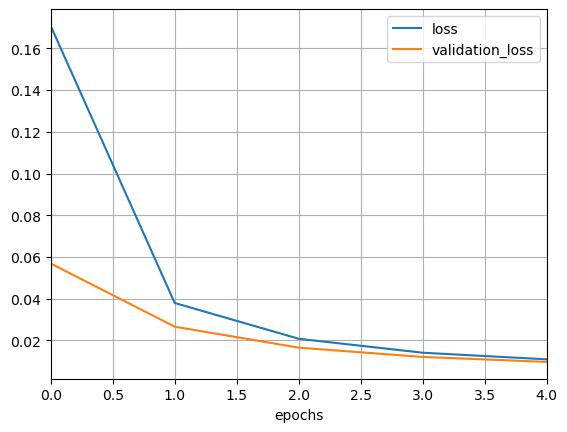

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.009309785440564156
Test MSE:  0.009309785440564156


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5


219/219 [==============================] - 6s 22ms/step - loss: 0.4144 - mean_squared_error: 0.4144 - val_loss: 0.3924 - val_mean_squared_error: 0.3924
Epoch 2/5
219/219 [==============================] - 5s 22ms/step - loss: 0.3671 - mean_squared_error: 0.3671 - val_loss: 0.3482 - val_mean_squared_error: 0.3482
Epoch 3/5
219/219 [==============================] - 5s 22ms/step - loss: 0.3233 - mean_squared_error: 0.3233 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 4/5
219/219 [==============================] - 5s 22ms/step - loss: 0.2818 - mean_squared_error: 0.2818 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 5/5
219/219 [==============================] - 5s 22ms/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 0.2259 - val_mean_squared_error: 0.2259


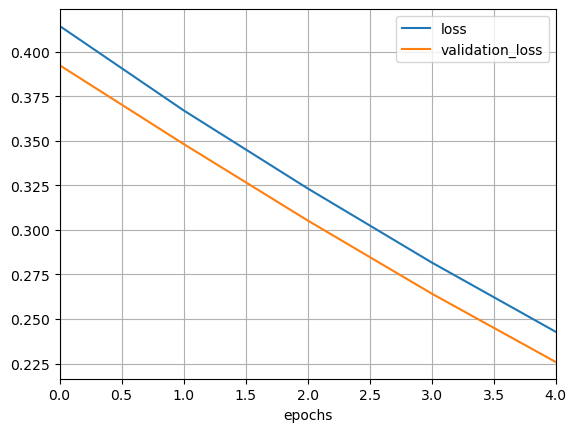

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5


219/219 [==============================] - 21s 90ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 2/5
219/219 [==============================] - 19s 88ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/5
219/219 [==============================] - 19s 87ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/5
219/219 [==============================] - 19s 89ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/5
219/219 [==============================] - 19s 88ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003457240993157029
Test MSE:  0.003457240993157029


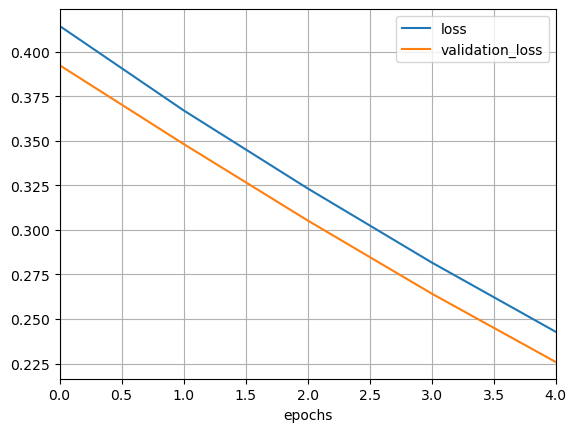

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

model_ltsm = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])
model_gru = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

model.summary()
model_ltsm.summary()
model_gru.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 128)         32896     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 193921 (757.50 KB)
Trainable params: 193921 (757.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Par

In [30]:
optimizer = Adam(learning_rate = 0.001)
optimizer_ltsm = Adam(learning_rate = 0.001)
optimizer_gru = Adam(learning_rate = 0.001)

nEpochs = 7

In [31]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model_ltsm.compile(loss="binary_crossentropy", optimizer=optimizer_ltsm, metrics=["accuracy"])
model_gru.compile(loss="binary_crossentropy", optimizer=optimizer_gru, metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=nEpochs, validation_split=0.2)

Epoch 1/7


625/625 [==============================] - 96s 151ms/step - loss: 0.7064 - accuracy: 0.4971 - val_loss: 0.6941 - val_accuracy: 0.4934
Epoch 2/7
625/625 [==============================] - 82s 131ms/step - loss: 0.6965 - accuracy: 0.4956 - val_loss: 0.6940 - val_accuracy: 0.4938
Epoch 3/7
625/625 [==============================] - 81s 129ms/step - loss: 0.6959 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5068
Epoch 4/7
625/625 [==============================] - 80s 128ms/step - loss: 0.6956 - accuracy: 0.4987 - val_loss: 0.6947 - val_accuracy: 0.4928
Epoch 5/7
625/625 [==============================] - 80s 128ms/step - loss: 0.6956 - accuracy: 0.4994 - val_loss: 0.6946 - val_accuracy: 0.4938
Epoch 6/7
625/625 [==============================] - 79s 127ms/step - loss: 0.7018 - accuracy: 0.5013 - val_loss: 0.6972 - val_accuracy: 0.5062
Epoch 7/7
625/625 [==============================] - 80s 127ms/step - loss: 0.6956 - accuracy: 0.4996 - val_loss: 0.6951 - val_accuracy: 0.4938


In [33]:
history_ltsm = model_ltsm.fit(X_train, y_train, epochs=nEpochs, validation_split=0.2)

Epoch 1/7
625/625 [==============================] - 31s 47ms/step - loss: 0.6288 - accuracy: 0.6302 - val_loss: 0.6484 - val_accuracy: 0.6178
Epoch 2/7
625/625 [==============================] - 14s 22ms/step - loss: 0.6072 - accuracy: 0.6736 - val_loss: 0.5550 - val_accuracy: 0.7362
Epoch 3/7
625/625 [==============================] - 11s 17ms/step - loss: 0.4916 - accuracy: 0.7732 - val_loss: 0.4486 - val_accuracy: 0.7988
Epoch 4/7
625/625 [==============================] - 10s 16ms/step - loss: 0.4283 - accuracy: 0.8082 - val_loss: 0.4317 - val_accuracy: 0.8058
Epoch 5/7
625/625 [==============================] - 10s 15ms/step - loss: 0.3905 - accuracy: 0.8265 - val_loss: 0.3988 - val_accuracy: 0.8180
Epoch 6/7
625/625 [==============================] - 9s 15ms/step - loss: 0.3649 - accuracy: 0.8401 - val_loss: 0.3995 - val_accuracy: 0.8206
Epoch 7/7
625/625 [==============================] - 9s 14ms/step - loss: 0.3428 - accuracy: 0.8508 - val_loss: 0.3751 - val_accuracy: 0.8314


In [34]:
history_gru = model_gru.fit(X_train, y_train, epochs=nEpochs, validation_split=0.2)

Epoch 1/7
625/625 [==============================] - 30s 46ms/step - loss: 0.6480 - accuracy: 0.5950 - val_loss: 0.5704 - val_accuracy: 0.7326
Epoch 2/7
625/625 [==============================] - 12s 19ms/step - loss: 0.4695 - accuracy: 0.7772 - val_loss: 0.4285 - val_accuracy: 0.8026
Epoch 3/7
625/625 [==============================] - 10s 16ms/step - loss: 0.3841 - accuracy: 0.8296 - val_loss: 0.3853 - val_accuracy: 0.8304
Epoch 4/7
625/625 [==============================] - 9s 15ms/step - loss: 0.3518 - accuracy: 0.8472 - val_loss: 0.3851 - val_accuracy: 0.8290
Epoch 5/7
625/625 [==============================] - 9s 14ms/step - loss: 0.3242 - accuracy: 0.8591 - val_loss: 0.4151 - val_accuracy: 0.8174
Epoch 6/7
625/625 [==============================] - 9s 14ms/step - loss: 0.3023 - accuracy: 0.8705 - val_loss: 0.3931 - val_accuracy: 0.8300
Epoch 7/7
625/625 [==============================] - 9s 14ms/step - loss: 0.2817 - accuracy: 0.8807 - val_loss: 0.3937 - val_accuracy: 0.8196


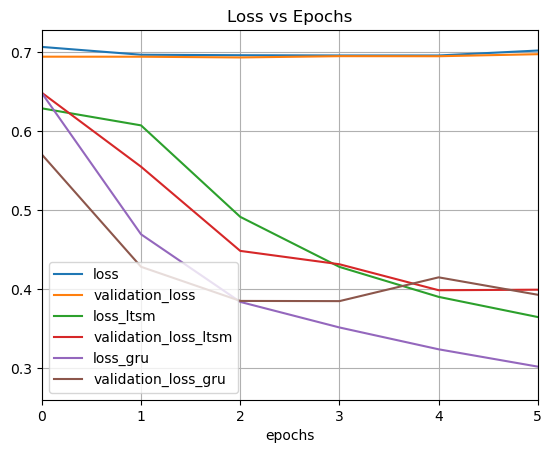

In [35]:
# Plotting the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history_ltsm.history['loss'], label='loss_ltsm')
plt.plot(history_ltsm.history['val_loss'], label='validation_loss_ltsm')
plt.plot(history_gru.history['loss'], label='loss_gru')
plt.plot(history_gru.history['val_loss'], label='validation_loss_gru')
plt.legend()
plt.grid()
plt.xlim([0,5])
plt.xlabel('epochs')
plt.title('Loss vs Epochs')
plt.show()

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

score = model_ltsm.evaluate(X_test, y_test, verbose=0)
print('LTSM Test loss:', score[0])
print(f'LTSM Test accuracy: ', score[1]*100, "%")

score = model_gru.evaluate(X_test, y_test, verbose=0)
print('GRU Test loss:', score[0])
print(f'GRU Test accuracy: ', score[1]*100, "%")

Test loss: 0.6944053769111633
Test accuracy:  50.0 %
LTSM Test loss: 0.37004557251930237
LTSM Test accuracy:  83.40799808502197 %
GRU Test loss: 0.3804086446762085
GRU Test accuracy:  83.06800127029419 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results